<a href="https://colab.research.google.com/github/HyeyoungKoh/Data-driven-steel-design/blob/main/Column_design_provisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fall 2022 CEE445: Steel Structures - Design of Members for Compression**

**by Hyeyoung Koh hyeyoung.koh@wisc.edu and Hannah Blum hannah.blum@wisc.edu**

**University of Wisconsin-Madison**

In this module, we learn how to
1. plot theoretical yield and buckling 
2. plot Eqn E3-2 and E3-3
3. calculate the slenderness values where the inelastic and elastic ranges meet
4. plot nominal and design strength

In [ ]:
#import libraries for Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. List section and material properties of the W14×61 cross-section.**

> Material properties from Table 2-4\
Cross-sectional properties from Table 1-1


In [ ]:
# Material properties
E = 29000 # Young's modulus, ksi
Fy = 50 # yield strength, ksi

# Cross-sectional properteis from Table 1-1
r = 5.98 # rx, W14x61
A = 17.9

K = 1.0 #effective length factor

**This code uses the provisions in Specification Section E3. This assumes the sections are nonslender. You must check if the section is nonslender as defined in Section B4.1 for elements in axial compression.**

**2. Calculate Euler buckling stress $F_e$ (Eq. E3-4) and critical buckling stress $F_{cr}$ (Eqs. E3-2 and E3-3).**

In [ ]:
L = np.linspace(0.01,1500,250) # Create a range of member length, inches, (start, stop, number of samples) 

#Create arrays for Fe and Fcr (needed for coding)
Fe = np.zeros(len(L)) 
Fcr = np.zeros(len(L))

#Calculate Fe and Fcr
for i in range(len(L)):
  Fe[i] = np.pi**2*E/(K*L[i]/r)**2 #Eq E3-4, elastic buckling stress (Euler buckling stress)
  if K*L[i]/r <= 4.71*np.sqrt(E/Fy): 
    Fcr[i] = (0.658**(Fy/Fe[i]))*Fy #Eq E3-2
  else:
    Fcr[i] = 0.877*Fe[i] #Eq E3-3

**3. Plot buckling stress curves**

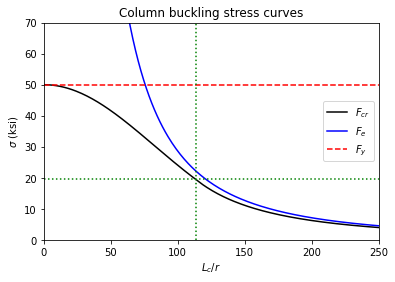

In [ ]:
plt.plot(K*L/r,Fcr, c='k', label=r'$F_{cr}$')
plt.plot(K*L/r,Fe, c='b', label=r'$F_e$')

# plot lines to show bounds
plt.axhline(y=Fy, color='r', linestyle='--', label = r'$F_y$') # horizontal line for Fy
plt.axhline(y=Fcr[np.max(np.where(L/r <= 4.71*np.sqrt(E/Fy)))], color='g', linestyle=':') # horizontal boundary for elastic/inelastic buckling
plt.axvline(x=4.71*np.sqrt(E/Fy), color='g', linestyle=':') # vertical boundary for elastic/inelastic buckling
plt.xlim(0,250)
plt.ylim(0,70)

plt.xlabel(r'$L_c/r$')
plt.ylabel(r'$\sigma$ (ksi)')
plt.title('Column buckling stress curves')
plt.legend()
plt.show()

**4. Plot column buckling strength, nominal and design**

In [ ]:
##### write your code below

